# Scikit-Learn 맛보기
## Iris 분류 - 결정트리, 서포트벡터머신(SVM), 로지스틱스 회귀


### 1. 데이터 전처리


In [ ]:
# sklearn에서 만든 예시 데이터 load_iris -> 이미 전처리 끝난 데이터 
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys() # 딕셔너리

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 같은 방식
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
## Feature data - X, numpy dimensional array
# .data[]
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
type(iris.data)

numpy.ndarray

In [16]:
## Feature name
# .feature_names
iris.feature_names # 리스트 형식

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# 컬럼 데이터에서 '(cm)' 제거 후 적용 
feature_names = [name[:-5] for name in iris.feature_names] # name[:-5] '공백+(cm)' 제외한 앞 글자
df = pd.DataFrame(iris.data, columns = feature_names)

# 'target' 필드 추가
df['target'] = iris.target
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [21]:
# 설명 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [22]:
df.groupby('target').describe() # 기초통계 전부 보기

sepal length                                             sepal width  \
              count   mean       std  min    25%  50%  75%  max       count   
target                                                                        
0              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8        50.0   
1              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0        50.0   
2              50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9        50.0   

               ... petal length      petal width                             \
         mean  ...          75%  max       count   mean       std  min  25%   
target         ...                                                            
0       3.428  ...        1.575  1.9        50.0  0.246  0.105386  0.1  0.2   
1       2.770  ...        4.600  5.1        50.0  1.326  0.197753  1.0  1.2   
2       2.974  ...        5.875  6.9        50.0  2.026  0.274650  1.4  1.8   

                       
        50%  75%  max  
target                 
0       0.2  0.3  0.6  
1       1.3  1.5  1.8  
2       2.0  2.3  2.5  

[3 rows x 32 columns]

In [23]:
df.groupby('target').agg(['mean', 'std']) # 평균, 표준편차만 

sepal length           sepal width           petal length            \
               mean       std        mean       std         mean       std   
target                                                                       
0             5.006  0.352490       3.428  0.379064        1.462  0.173664   
1             5.936  0.516171       2.770  0.313798        4.260  0.469911   
2             6.588  0.635880       2.974  0.322497        5.552  0.551895   

       petal width            
              mean       std  
target                        
0            0.246  0.105386  
1            1.326  0.197753  
2            2.026  0.274650

In [24]:
import matplotlib.pyplot as plt
setosa = df[df.target == 0].iloc[:, :-1]
setosa.shape

(50, 4)

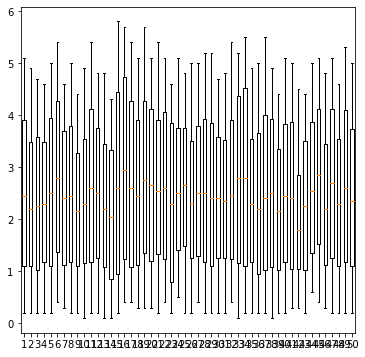

In [27]:
plt.figure(figsize=(6,6))
plt.boxplot(setosa, ) 
plt.show()
# 왜 오류..? 원래는 이게 맞아!! 

In [28]:
setosa.T.shape

(4, 50)

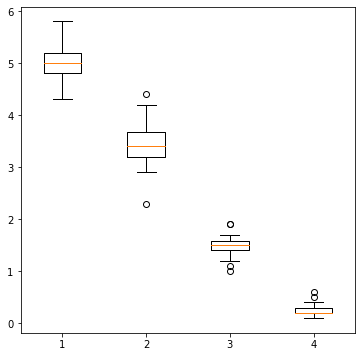

In [26]:
plt.figure(figsize=(6,6))
plt.boxplot(setosa.T) # transpose 하면 제대로 나옴 
plt.show()

# 이상치(outlier) 1.5배만큼 상하단 벗어난 값 
# 차트에서 동그라미 ㅎㅎ 

In [29]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### 2. 학습과 테스트 데이터로 분리

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target,
                                                    random_state=2022)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
# 기본값 => train:test = 3:1  (0.75:0.25)

((112, 4), (38, 4), (112,), (38,))

In [33]:
np.unique(Y_train, return_counts=True) # 이렇게 뽑으면 불균형적인 값들 나옴 

(array([0, 1, 2]), array([37, 38, 37]))

In [35]:
# y값을 균등하게 뽑으려면 stratify 옵션 설정 
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target,
                                                    stratify=iris.target, random_state=2022)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape # shape은 변하지 않지만 

((112, 4), (38, 4), (112,), (38,))

In [36]:
np.unique(Y_train, return_counts=True)  # x,y 균일하게 변함!

(array([0, 1, 2]), array([37, 37, 38]))

In [37]:
# test size 비율을 20%로 설정
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target,
                                                    stratify=iris.target, test_size=0.2, random_state=2022)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [38]:
np.unique(Y_train, return_counts=True) 

(array([0, 1, 2]), array([40, 40, 40]))

### 3. 학습

- 결정 트리(Decision Tree)

In [39]:
from sklearn.tree import DecisionTreeClassifier # 대문자-클래스, 소문자-함수

In [41]:
# 모델 생성 - 객체 생성 
dtc = DecisionTreeClassifier(random_state=2022)

In [42]:
# 모델 하이퍼 파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [46]:
# 학습(훈련)
dtc.fit(X_train, Y_train) # (데이터 값, 레이블 값)

DecisionTreeClassifier(random_state=2022)

### 4. 예측

In [52]:
pred_dt = dtc.predict(X_test) # 예측값과 비교하기 위해서 X 값

In [53]:
res = pd.DataFrame({'y':Y_test, 'DT':pred_dt}) # 테스트값, 예측값 
res.head()

,y,DT
0,2,2
1,0,0
2,1,2
3,1,1
4,0,0


### 5. 평가

In [54]:
# 정확도 측정 
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, pred_dt)

0.9333333333333333

### 예측과 평가 한번에 처리

In [55]:
dtc.score(X_test, Y_test)

0.9333333333333333

- Support Vector Machine(SVM)

In [56]:
# 3) 모델 생성 및 학습 
from sklearn.svm import SVC # 사용 모델의 차이점만 있음. 나머지 과정은 동일 

scv = SVC(random_state=2022)
scv.fit(X_train, Y_train)

SVC(random_state=2022)

In [58]:
# 4) 예측
pred_sv = scv.predict(X_test)

In [59]:
# 5) 평가
accuracy_score(Y_test, pred_sv)

0.9333333333333333

- Logotocs Regression (로지스틱 회귀공식)



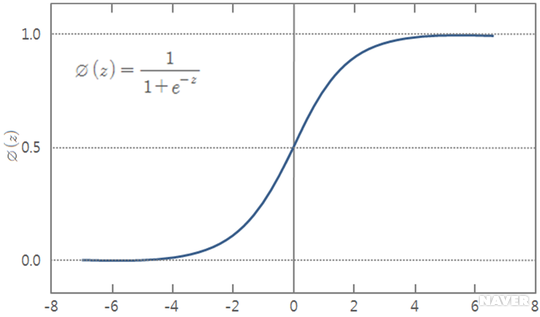

In [60]:
# 3) 모델 생성 및 학습 
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state=2022, max_iter=500) # max_iter=500 -> 스케일이 다를 경우 시간소요가 오래 걸려서 max_iter 필요
lrc.fit(X_train, Y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [61]:
# 4) 예측 
pred_lr = lrc.predict(X_test)

In [62]:
# 5) 평가
accuracy_score(Y_test, pred_lr)

0.9333333333333333

In [64]:
# 여기 참고 참고~~
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, Y_train)    
#=> 에러!! 100번이 기본값이지만, 부족해서 늘려줘야해
# 사실 좋은 방법은 아님 ㅠㅠ                     

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=2022)

In [65]:
from sklearn.preprocessing import MinMaxScaler # 스케일 변경해줌 0~1 -> 0~100 이런식?
iris_scaled = MinMaxScaler().fit_transform(iris.data) # 0~1 사이 값으로 스케일 변경해줌 

In [66]:
iris_scaled[:5] 

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [67]:
#X_train2, X_test2, y_train, y_test
# 리턴값으로 사용하지 않을 경우
X_train2, X_test2, _, _ = train_test_split(iris_scaled, iris.target, 
                                           stratify=iris.target, test_size=0.2, random_state=2022) 

In [68]:
X_train2.shape , X_test2.shape
# 여기까지는 참고 참고~~

((120, 4), (30, 4))

- 3가지 모델 비교
결정트리(DT), 서포트벡터머신(SVM), 로지스틱스 회귀(LR)

In [71]:
dtc.score(X_test, Y_test), scv.score(X_test, Y_test), lrc.score(X_test, Y_test) # 원래 svc 인뎅,, 잘못 지정해줌ㅎㅎ

(0.9333333333333333, 0.9333333333333333, 0.9333333333333333)

In [72]:
res['SV'] = pred_sv
res['LR'] = pred_lr
res.head()

,y,DT,SV,LR
0,2,2,2,2
1,0,0,0,0
2,1,2,2,2
3,1,1,1,1
4,0,0,0,0
